# Logistic Regression for Heart Disease Prediction

In this notebook, I'll explore Logistic Regression to predict if there is heart disease or not. for this purpose, I use the dataset provided by Cleveland database, to compare the performance of logistic regression techniques as well.

The dataset has 14 features which are ready to use without any feature engineering. As a requirement, I'll first create a regular Logistic Regression model, then I'll use Ridge and Lasso regularization techniques and compare the performances. 
As our outcome variable is binary represented, I'll apply above-mentioned techniques as a penalty (L2-ridge technique, L1-lasso technique) to the regular Logistic Regression.



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import confusion_matrix

from scipy.stats import norm
from scipy import stats

## 1. Data Preparation 

In [2]:
df = pd.read_csv(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 3\data\heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


The dataset has no missing values. It consist of 303 entries and 14 variables.
## Vanilla Logistic Regression: No Regularization

In [6]:
lr = linear_model.LogisticRegression()

# assign input and outcome variables
X = df.drop('target', axis = 1)
Y = df.target

# fit the model
lr.fit(X,Y)

# prdicted Y
Y_lr = lr.predict(X)
print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nAccuracy score:')
print(lr.score(X, Y), '\n')

# cross validation
score = cross_val_score(lr, X, Y, cv = 10)
print("10 folds cross-validation Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))



Coefficients: 
 [[ 0.00904256 -1.37761361  0.80244789 -0.01546083 -0.00329019 -0.01009756
   0.45980149  0.02940344 -0.78418662 -0.50843895  0.51947351 -0.72961309
  -0.80239451]]

Intercept: 
 [0.40801532]

Accuracy score:
0.8514851485148515 

10 folds cross-validation Accuracy: 0.82 (+/- 0.14)


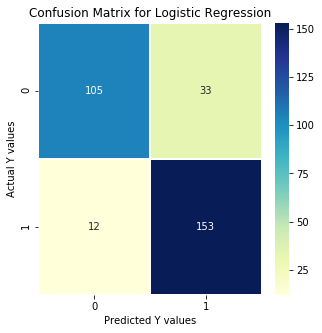

In [8]:
# confusion matrix
cm_lrc = confusion_matrix(Y, Y_lr)
# plot the confusion matrix
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc, annot = True,linewidths=0.5,cmap = 'YlGnBu',fmt = ".0f",ax=ax)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Y values")
plt.ylabel("Actual Y values")
plt.show()

At first glance, the model looks good. It received 0.85 accuracy and 10 folds cross-validation yields 0.82 mean accuracy with 0.14 standard deviation, which is not really good. The model correctly predicted 82% of the heart disease instances and 89% of no heart disease instances.
Next, I'll use Ridge technique to minimize the model variance, if feature multicollinearity causes overfitting.

## Ridge Logistic Regression

In [9]:
ridge = linear_model.LogisticRegression(penalty = 'l2', C = 100)

# assign input and outcome variables
X = df.drop('target', axis = 1)
Y = df.target

# fit the model
ridge.fit(X,Y)

# predicted Y
Y_ridge = ridge.predict(X)

print('\nCoefficients: \n', ridge.coef_)
print('\nIntercept: \n', ridge.intercept_)
print('\nAccuracy score:')
print(ridge.score(X, Y), '\n')

# cross validation 
score = cross_val_score(ridge, X, Y, cv = 10)
print("10 folds cross-validation Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))



Coefficients: 
 [[-0.00380766 -1.74704068  0.85762609 -0.01918306 -0.00456358  0.03074502
   0.46969122  0.02374472 -0.97256992 -0.53628938  0.58084889 -0.77165782
  -0.89485649]]

Intercept: 
 [3.22375658]

Accuracy score:
0.8514851485148515 

10 folds cross-validation Accuracy: 0.81 (+/- 0.14)


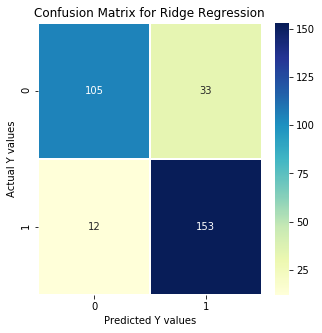

In [11]:
# plot the confusion matrix
cm_ridge = confusion_matrix(Y, Y_ridge)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc, annot = True,linewidths=0.5,cmap = 'YlGnBu',fmt = ".0f",ax=ax)
plt.title("Confusion Matrix for Ridge Regression")
plt.xlabel("Predicted Y values")
plt.ylabel("Actual Y values")
plt.show()

The results are pretty similar to the Vanilla Logistic Regression. In this model, errors in the measurement (standard deviation) did not change, but the mean accuracy score dropped 0.1 points. I can check the C values against cross-validation scores in a defined range and take the best C value for the model.

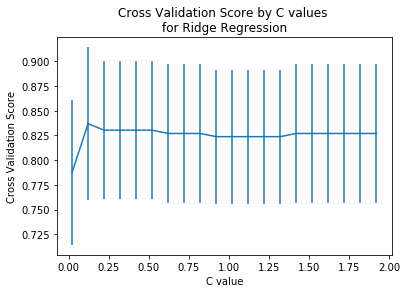

In [282]:
# C values range
c_values = [x / 50.0 for x in range(1, 100, 5)]

# create lists to hold cross validation scores and standard deviation values
ridge_cvs = []
ridge_std = []

# start the loop
for c in c_values:
    ridge = linear_model.LogisticRegression(penalty='l2', C=c)
    X = df.drop('target', axis = 1)
    Y = df.target

    # Fit the model.
    fit = ridge.fit(X, Y)
    ridge_score = cross_val_score(ridge, X, Y, cv=10)
    ridge_cvs.append(ridge_score.mean())
    ridge_std.append(ridge_score.std())
    
# create plot
plt.errorbar(c_values, ridge_cvs, yerr = ridge_std)
plt.title('Cross Validation Score by C values \nfor Ridge Regression')
plt.xlabel('C value')
plt.ylabel('Cross Validation Score')
plt.show()

Error bars are too large, but I see some trend around C = 0.1. Let see what changes, if I change the C value to 0.1

In [12]:
ridge = linear_model.LogisticRegression(penalty = 'l2', C = 0.1)

X = df.drop('target', axis = 1)
Y = df.target

#fit the model
ridge.fit(X,Y)

print('Accuracy score: ', ridge.score(X, Y), '\n')

score = cross_val_score(ridge, X, Y, cv = 10)
print("10 folds cross-validation Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy score:  0.8613861386138614 

10 folds cross-validation Accuracy: 0.84 (+/- 0.15)


With C = 0.1, the accuracy score of the model increased by 1 point and the mean accuracy score with 10 folds became 3 points more accurate. Ridge technique added more accuracy to the model, however, our errors in measurement still is very large. 

## Lasso Logistic Regression
Lasso technique overcomes the disadvantage of Ridge regression by not only punishing high values of the coefficients β but actually setting them to zero if they are not relevant. It can reduce the impact of non-relevant features and even remove them.

In [13]:
lasso = linear_model.LogisticRegression(penalty = 'l1', C=1)

# define input and outcome variables
X = df.drop('target', axis = 1)
Y = df.target

# fit the model
lasso.fit(X,Y)

# predicted Y
Y_lasso = lasso.predict(X)

print('\nCoefficients: \n', lasso.coef_)
print('\nIntercept: \n', lasso.intercept_)
print('\nAccuracy score:')
print(lasso.score(X, Y), '\n')

# cross validation
score = cross_val_score(lasso, X, Y, cv = 10)
print("10 folds cross-validation Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))



Coefficients: 
 [[ 0.0102822  -1.43658536  0.79419437 -0.01482673 -0.00341557  0.
   0.40646014  0.03120674 -0.74763536 -0.49114573  0.4969791  -0.71485397
  -0.7651254 ]]

Intercept: 
 [0.]

Accuracy score:
0.8547854785478548 

10 folds cross-validation Accuracy: 0.83 (+/- 0.14)


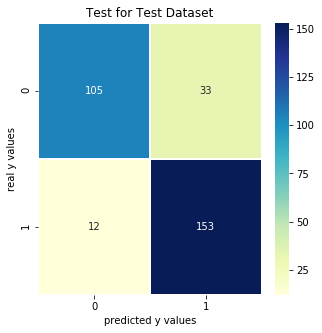

In [285]:
# plot the confusion matrix
cm_lasso = confusion_matrix(Y, Y_lasso)

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc, annot = True,linewidths=0.5, cmap = 'YlGnBu',fmt = ".0f", ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

Confusion matrix shows the same exact results as in previous models. Mean accuracy score is 0.1 point higher than Vanilla Logistic model. I'll check C value for this model, plotting the Cross Validation Scores by C values in a defined range.

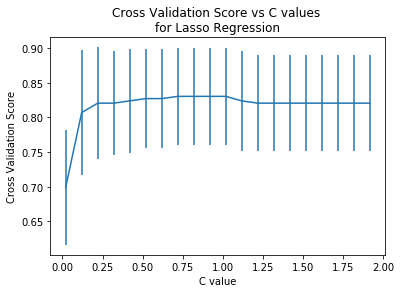

In [286]:
# C values range
c_values = [x / 50.0 for x in range(1, 100, 5)]

# lists to hold cross validation scores and standard deviation values
lasso_cvs = []
lasso_std = []

# start the loop
for c in c_values:
    lasso = linear_model.LogisticRegression(penalty='l1', C=c)
    X = df.drop('target', axis = 1)
    Y = df.target

    # Fit the model.
    fit = lasso.fit(X, Y)
    lasso_score = cross_val_score(lasso, X, Y, cv=10)
    lasso_cvs.append(lasso_score.mean())
    lasso_std.append(lasso_score.std())
    
# create plot
plt.errorbar(c_values, lasso_cvs, yerr = lasso_std)
plt.title('Cross Validation Score vs C values \nfor Lasso Regression')
plt.xlabel('C value')
plt.ylabel('Cross Validation Score')
plt.show()

It looks like we don't have clear trend for the vest C value neither for Ridge, not for Lasso model.

Prediction results for all models are the same if we don't consider small changes in accuracy scores. If we compare the performance of the models, I would say that the ridge technique gave better results after configuration tuning. I could not find any optimal C values for better results. In conclusion, I got more satisfying results with Ridge technique and this model can be considered as a winner.